In [26]:
%matplotlib inline
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización
import lec4_graphs as gfx
# evitar warnings y deprecaciones
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams['figure.figsize']=(8,6)

# 1. Evaluar juicios de hipótesis (2 puntos): para evaluar la pertinencia de diversas hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.

● 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se
identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se
identificaron como heterosexuales. El objetivo era medir actitudes frente a la
adopción homoparental. La organización encargada de procesar los datos obtuvo
los siguientes resultados:
    ○ El 67% de los encuestados por heterosexuales se mostró a favor de la
    adopción homoparental, mientras que un 72% de los encuestados por
    activistas que se identificaron como homosexuales se mostraron a favor
    de la adopción homoparental.
    ○ Asumiendo que la hipótesis nula es que ambos porcentajes no son
    diferentes, y la hipótesis alternativa es que existe una diferencia
    substancial entre ambos.
    ○ Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la
    alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima
    con la que sería posible rechazar la hipótesis nula en favor de la alternativa
    con estos resultados?

# Con un 95% de confianza, el valor de z es 1.96 y un pvalor de 0.025. Bajo esto, el p-valor del ejercicio esta dentro de la nula, por lo cual se acepta la hipotesis nula.

# 2. Importar la base de datos utilizada la sesión presencial anterior (2 puntos):

● Agregue una serie de variables binarias por cada continente de la variable
region.
Tip: Utilice np.where para ello.
● De manera similar a la sesión anterior, enfóquese en las siguientes variables:
○ Apellidos desde la A hasta la N: Enfocarse en las variables chldmort,
adfert y life.
○ Apellidos desde la N hasta la Z: Enfocarse en las variables femlab,
literacy y school.

In [27]:
df=pd.read_csv('nations.csv', index_col=0, encoding='iso-8859-1')

In [28]:
def binarizar (dataframe, columna):
    valor_columna = dataframe[columna].unique()
    for vc in valor_columna:
        dataframe[vc]=np.where(dataframe[columna]==vc,1,0)

In [29]:
binarizar(df,'region')

In [30]:
df.sample(10)

country    region           gdp    school      adfert  chldmort  \
77            Panama  Americas  10682.400391  9.200000   82.599998     23.50   
76         Nicaragua  Americas   2421.199951  5.450000  112.699997     28.50   
12   Congo (Dem Rep)    Africa    279.799988  3.416667  201.399994    199.00   
65          Dominica  Americas   7800.399902  7.700000   20.000000     10.75   
79              Peru  Americas   7198.000000  8.450000   54.700001     24.00   
11             Congo    Africa   3628.000000  5.850000  118.699997    125.75   
131           Turkey      Asia  11529.400391  6.266666   39.200001     23.50   
83          Suriname  Americas   6441.250000  7.200000   39.500000     28.25   
93            Bhutan      Asia   4072.399902  2.300000   50.200001     83.50   
51            Zambia    Africa   1211.599976  6.400000  146.800003    147.75   

          life       pop      urban  femlab   literacy        co2       gini  \
77   75.533333   3378133  72.866669  0.5892  93.599998   7.000000  52.299999   
76   72.949997   5602584  56.583336  0.5680  78.000000   2.850000  52.299999   
12   47.516666  61654348  33.633331  0.6552  66.800003   0.100000  44.400002   
65   77.150002     68317  67.050003     NaN        NaN   6.250000        NaN   
79   73.183334  28316050  75.983337  0.7564  88.300003   5.050000  48.000000   
11   56.016666   3785517  61.133331  0.7544        NaN   1.550000  47.299999   
131  72.966667  70453616  68.466667  0.3472  89.033333  12.950000  39.700001   
83   69.550003    512317  68.283333  0.5670  94.599998  19.450001        NaN   
93   65.849998    693933  32.816666  0.7150  52.799999   2.250000        NaN   
51   46.599998  12243300  35.316666  0.7628  70.900002   0.800000        NaN   

     Africa  Americas  Asia  Europe  Oceania  
77        0         1     0       0        0  
76        0         1     0       0        0  
12        1         0     0       0        0  
65        0         1     0       0        0  
79        0         1     0       0        0  
11        1         0     0       0        0  
131       0         0     1       0        0  
83        0         1     0       0        0  
93        0         0     1       0        0  
51        1         0     0       0        0

# 3.Implementar una función de prueba de hipótesis a mano (3 puntos):
    ● La función debe ingresar los siguientes argumentos:
        ○ df: La tabla de datos.
        ○ variable: La variable a analizar.
        ○ binarize: El indicador binario a utilizar.

In [31]:
def hipotesis_a_mano(dataframe,variable,binarize):
    df_bin_1 = dataframe[dataframe[binarize]==1]
    df_bin_0 = dataframe[dataframe[binarize]==0]
    prueba=stats.ttest_ind(df_bin_1[variable].dropna(),df_bin_0[variable].dropna())
    media_1=(df_bin_1[variable].mean())
    media_0=(df_bin_0[variable].mean())
    valor_t=prueba[0]
    valor_p=prueba[1]
    dif_medias=media_0-media_1
    print ('Variable', variable, 'con binarización ',binarize)
    print ('Media 0: ',media_0,', Media 1: ',media_1)
    print ('Valor Diferencia Medias: ',dif_medias)
    print ('Valor t: ',valor_t,' ,Valor p: ',valor_p)

In [32]:
variables_apellido= ['chldmort','adfert','life']
regiones=df['region'].unique()

In [33]:
regiones

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [34]:
for x in variables_apellido:
    for cont in regiones:
        hipotesis_a_mano(df,x,cont)

Variable chldmort con binarización  Africa
Media 0:  24.74822695035461 , Media 1:  109.75
Valor Diferencia Medias:  -85.0017730496454
Valor t:  14.17367667788517  ,Valor p:  1.244572684496239e-31
Variable chldmort con binarización  Americas
Media 0:  53.052215189873415 , Media 1:  23.264285714285716
Valor Diferencia Medias:  29.7879294755877
Valor t:  -3.08561941878294  ,Valor p:  0.00233300081092071
Variable chldmort con binarización  Asia
Media 0:  51.141379310344824 , Media 1:  37.104166666666664
Valor Diferencia Medias:  14.03721264367816
Valor t:  -1.602738386676471  ,Valor p:  0.1106448646711535
Variable chldmort con binarización  Europe
Media 0:  59.29 , Media 1:  7.046511627906977
Valor Diferencia Medias:  52.243488372093026
Valor t:  -6.262400472976766  ,Valor p:  2.4506589890929246e-09
Variable chldmort con binarización  Oceania
Media 0:  48.34410112359551 , Media 1:  39.416666666666664
Valor Diferencia Medias:  8.927434456928843
Valor t:  -0.6277779742677246  ,Valor p:  0.53

# 4. Implementar una función que grafique los histogramas para ambas muestras (3 puntos)
    ● Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente
    ● Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y 
    posteriormente grafique. Concluya con los principales resultados al respecto.

In [35]:
def binarize_histogram_plt(dataframe, variable, binarize):
    tmp = dataframe
    
    hist_1 = tmp[tmp[binarize] == 1][variable].dropna()
    hist_0 = tmp[tmp[binarize] == 0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, color='lightgrey', label="Grafico", alpha=.5)
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
    
    plt.subplot(1, 2, 2)
    plt.hist(hist_1,color='lightgrey',label="Grafico", alpha=.5)
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(tmp[variable]), 3)))

****Intente realizar una doble iteración para obtener el gráfico por variable y continente, pero este se dibuja sobre el mismo. Por esta razón y con fin de cumplir con el desafio realice la itereación de forma manual para obtener los 15 gráficos. Me gustaria poder revisar en la turoria del viernes, para ver la forma de realizarlo de manera mas eficiente***

for x in variables_apellido:
    for cont in regiones:
        print("Gráfico de Varibale: ",x,"y Continente: ",cont)
        binarize_histogram_plt(df,x,cont)
        print()

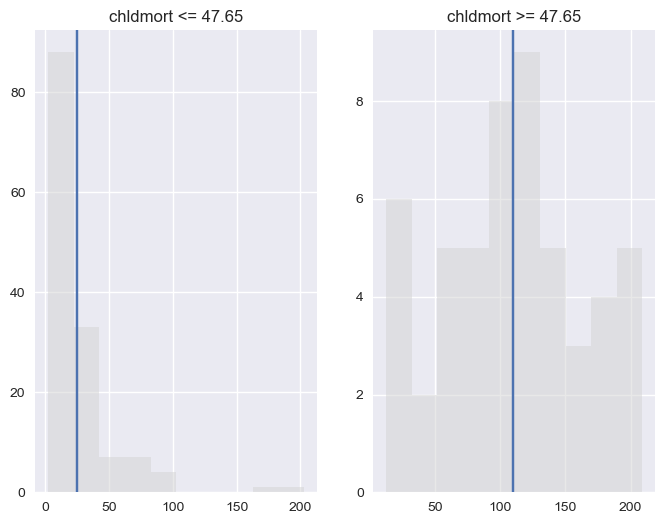

In [ ]:
binarize_histogram_plt(df,'chldmort','Africa')

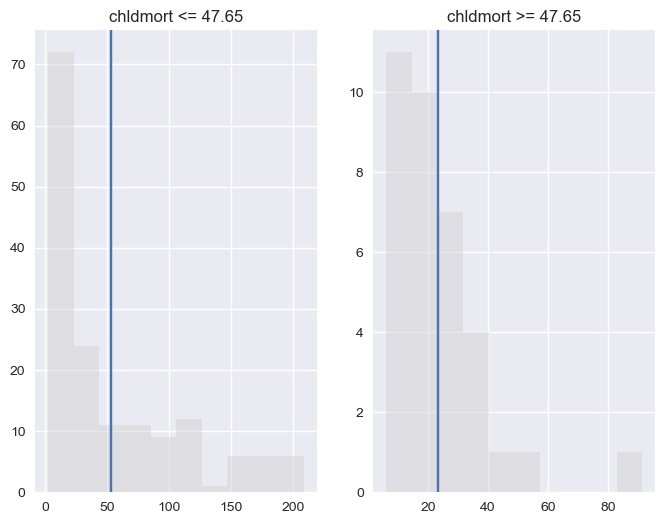

In [12]:
binarize_histogram_plt(df,'chldmort','Americas')

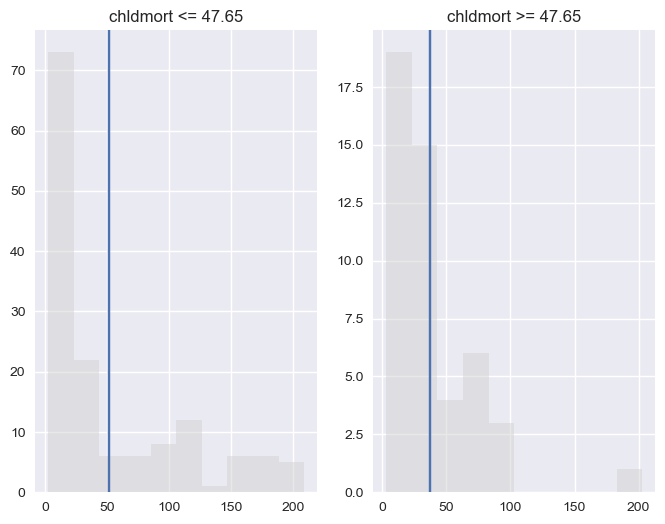

In [13]:
binarize_histogram_plt(df,'chldmort','Asia')

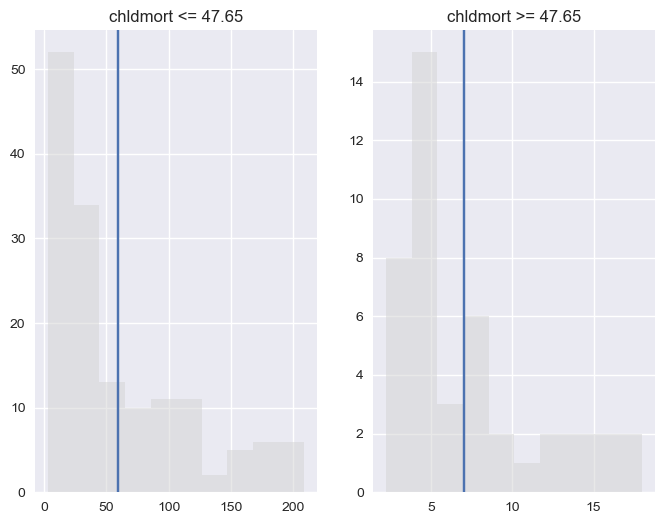

In [14]:
binarize_histogram_plt(df,'chldmort','Europe')

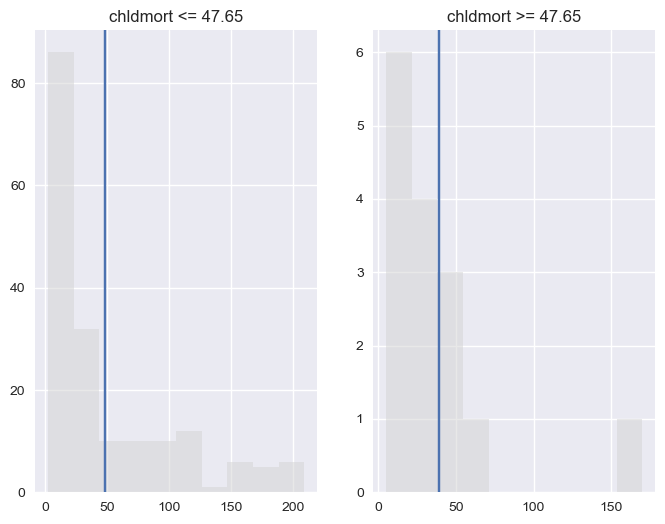

In [15]:
binarize_histogram_plt(df,'chldmort','Oceania')

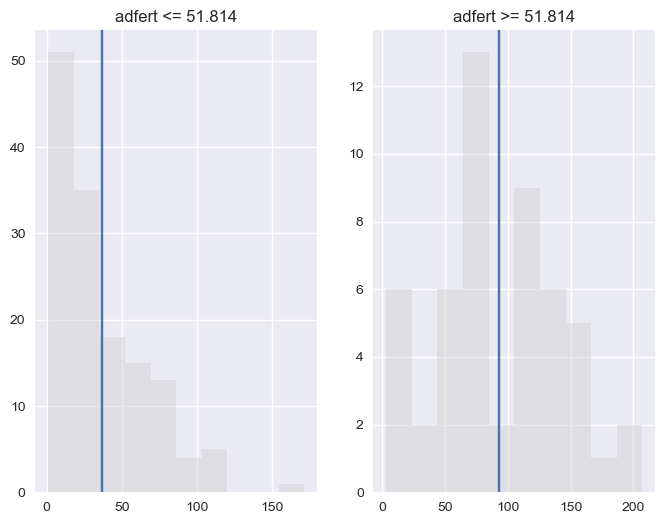

In [16]:
binarize_histogram_plt(df,'adfert','Africa')

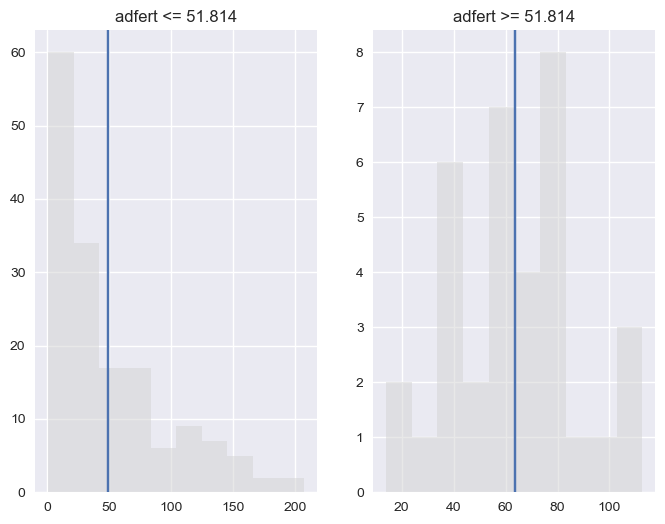

In [17]:
binarize_histogram_plt(df,'adfert','Americas')

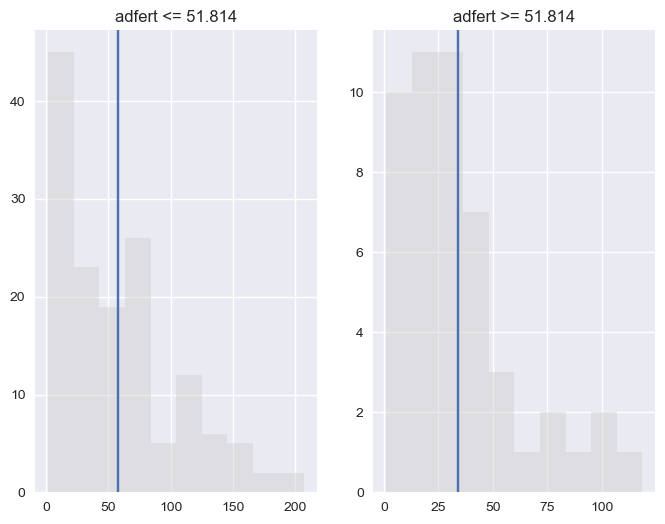

In [18]:
binarize_histogram_plt(df,'adfert','Asia')

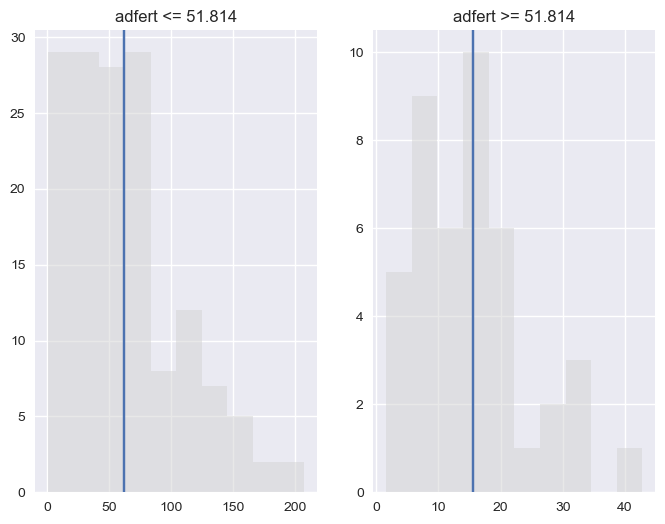

In [19]:
binarize_histogram_plt(df,'adfert','Europe')

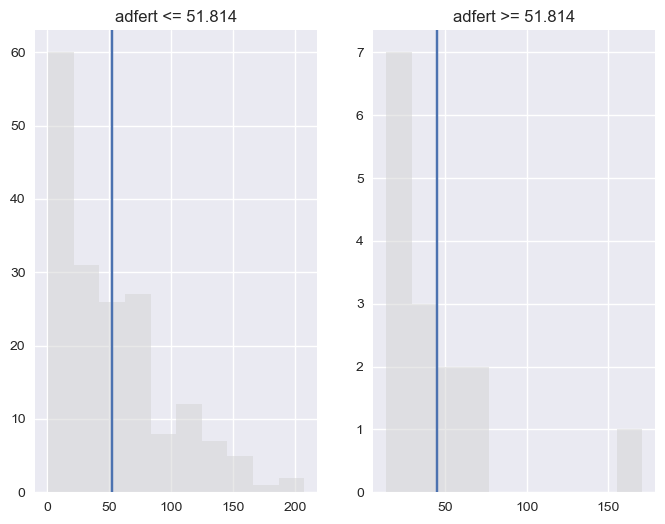

In [20]:
binarize_histogram_plt(df,'adfert','Oceania')

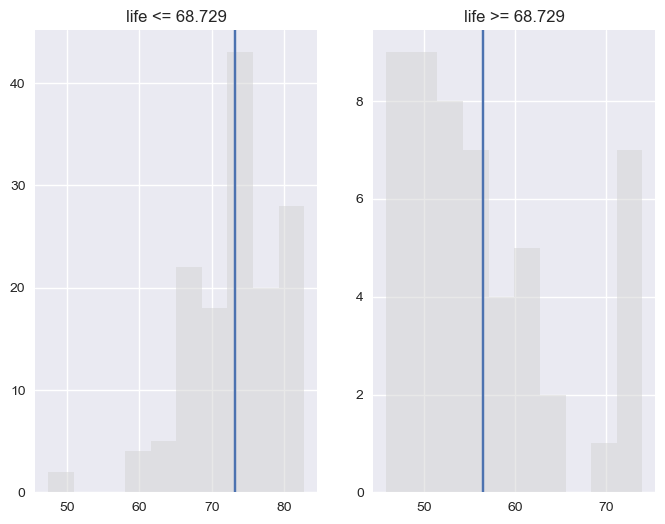

In [21]:
binarize_histogram_plt(df,'life','Africa')

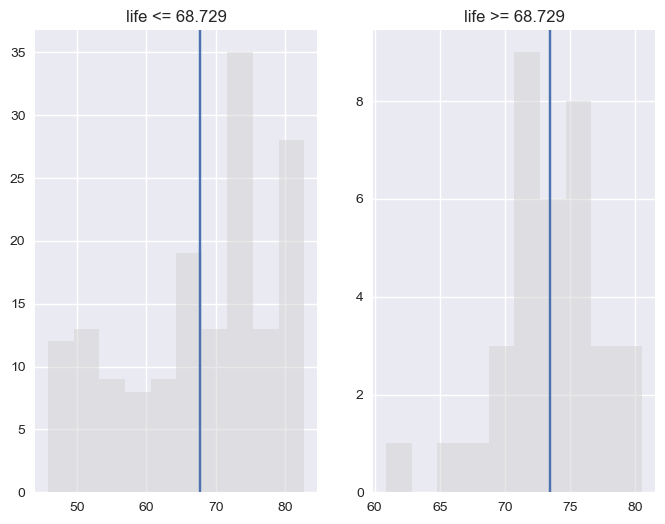

In [22]:
binarize_histogram_plt(df,'life','Americas')

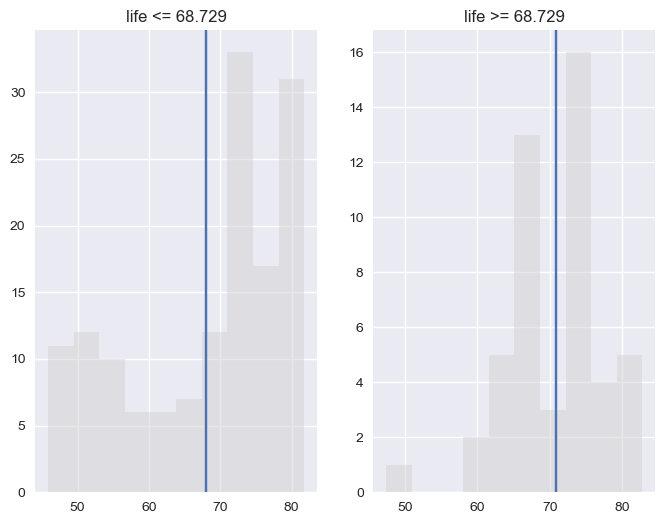

In [23]:
binarize_histogram_plt(df,'life','Asia')

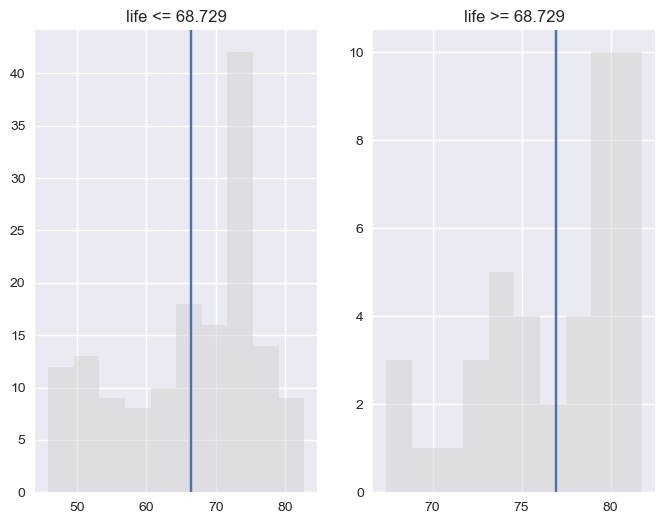

In [24]:
binarize_histogram_plt(df,'life','Europe')

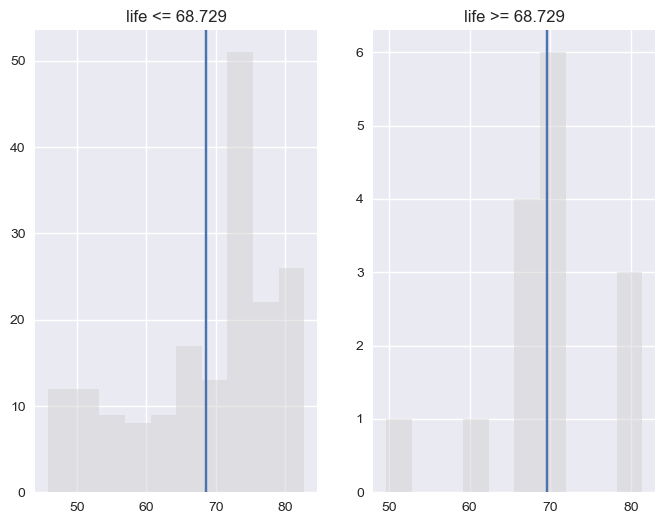

In [25]:
binarize_histogram_plt(df,'life','Oceania')